In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))

        def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
        return(out,boundarypos)

In [4]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

woff = [27e-9,40e-9,50e-9,60e-9,70e-9,80e-9,90e-9,100e-9,110e-9,120e-9]

woffi = []
for i in range(len(woff)):
    woffi.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff[i],won,p,j))

#test = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

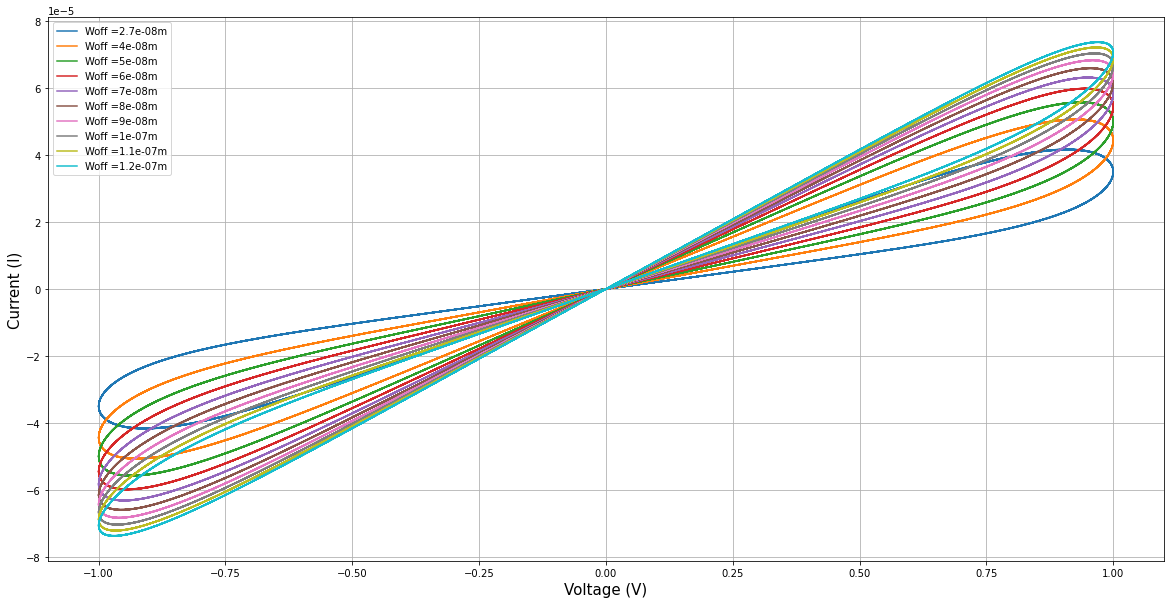

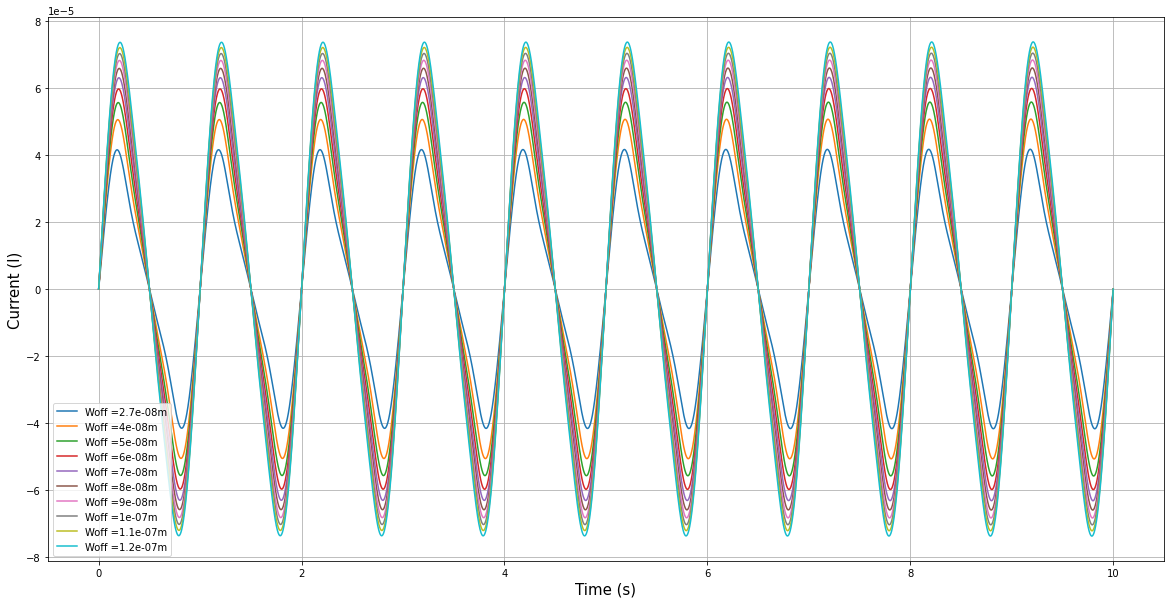

In [5]:
#colour=['red','green','blue','cyan','orange','purple','gray','pink','black','yellow']

plt.figure(figsize=(20,10))
for i in range(len(woffi)):
    plt.plot(v,woffi[i][0],label='Woff ='+str(woff[i])+'m')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(woffi)):
    plt.plot(t,woffi[i][0],label='Woff ='+str(woff[i])+'m')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

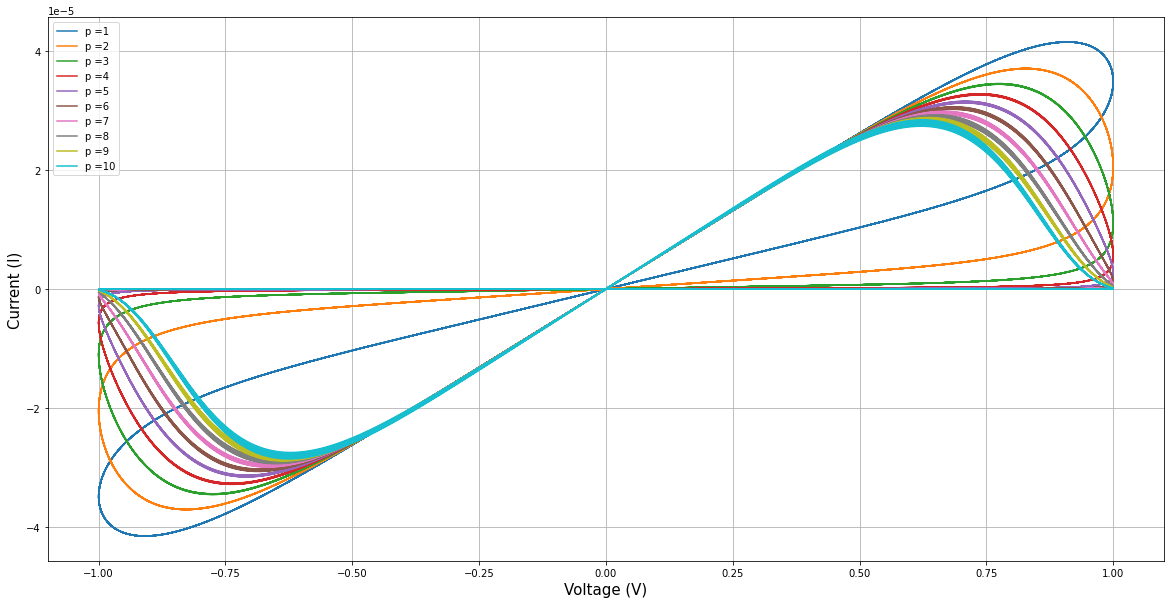

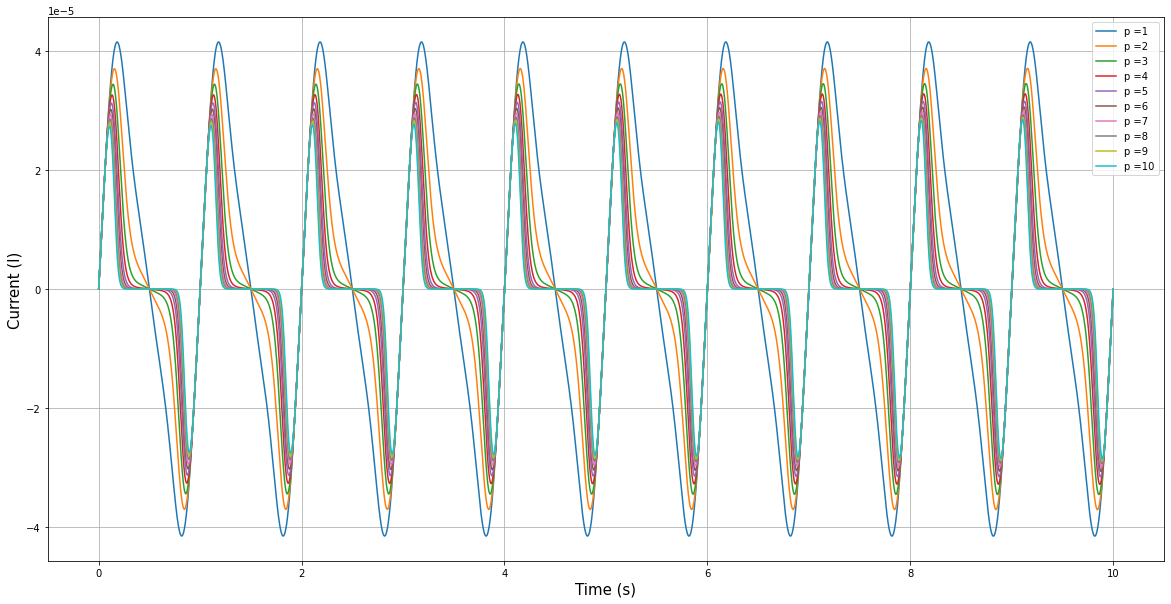

In [6]:
t = np.arange(0,10,0.00001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

p = [1,2,3,4,5,6,7,8,9,10]

pi=[]
for i in range(len(p)):
    pi.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p[i],j))

    
plt.figure(figsize=(20,10))
for i in range(len(pi)):
    plt.plot(v,pi[i][0],label='p ='+str(p[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(pi)):
    plt.plot(t,pi[i][0],label='p ='+str(p[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

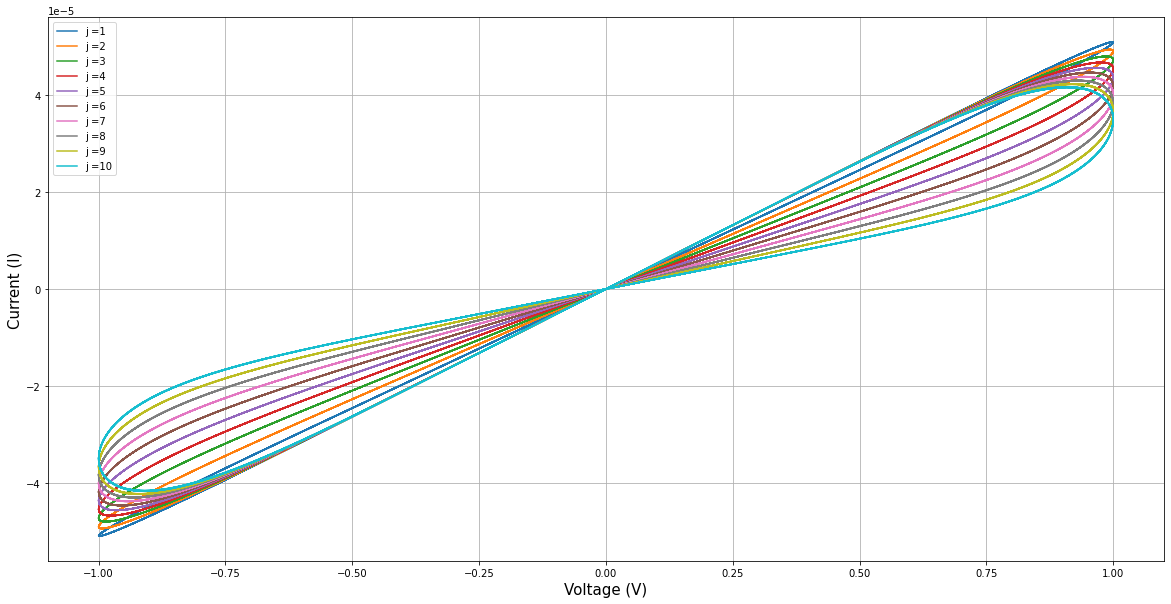

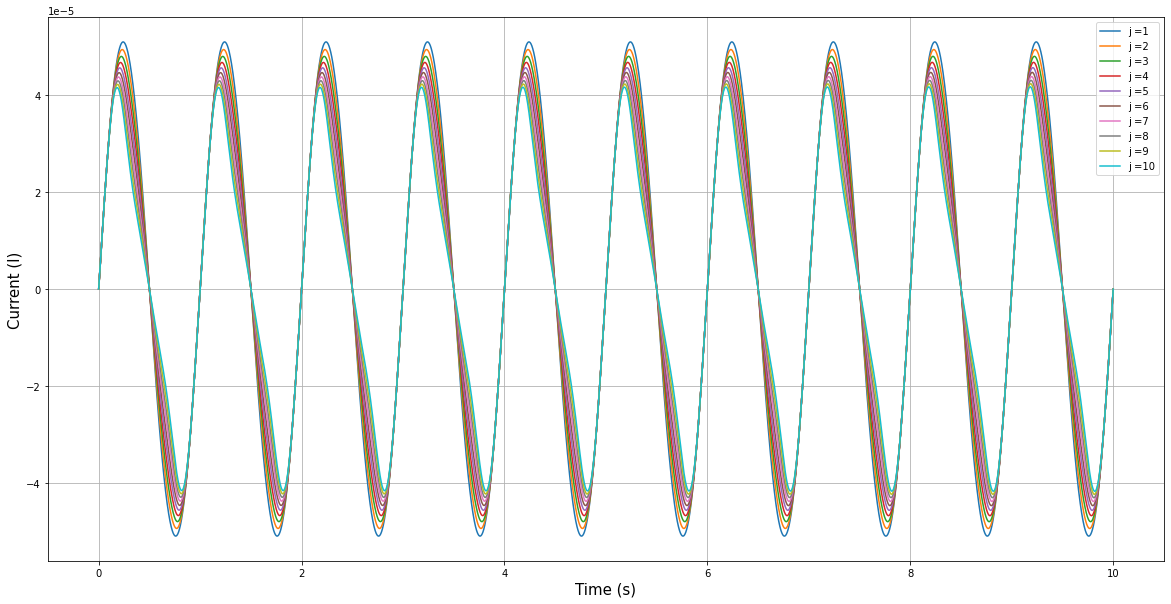

In [7]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

j = [1,2,3,4,5,6,7,8,9,10]

ji=[]
for i in range(len(j)):
    ji.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j[i]))

    
plt.figure(figsize=(20,10))
for i in range(len(ji)):
    plt.plot(v,ji[i][0],label='j ='+str(j[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(ji)):
    plt.plot(t,ji[i][0],label='j ='+str(j[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

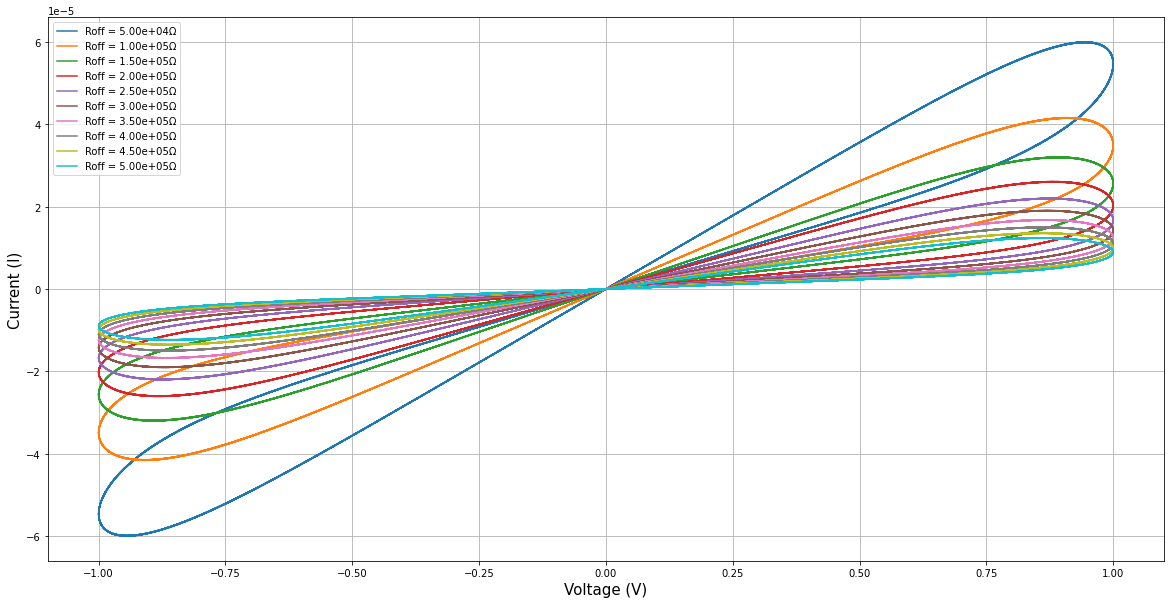

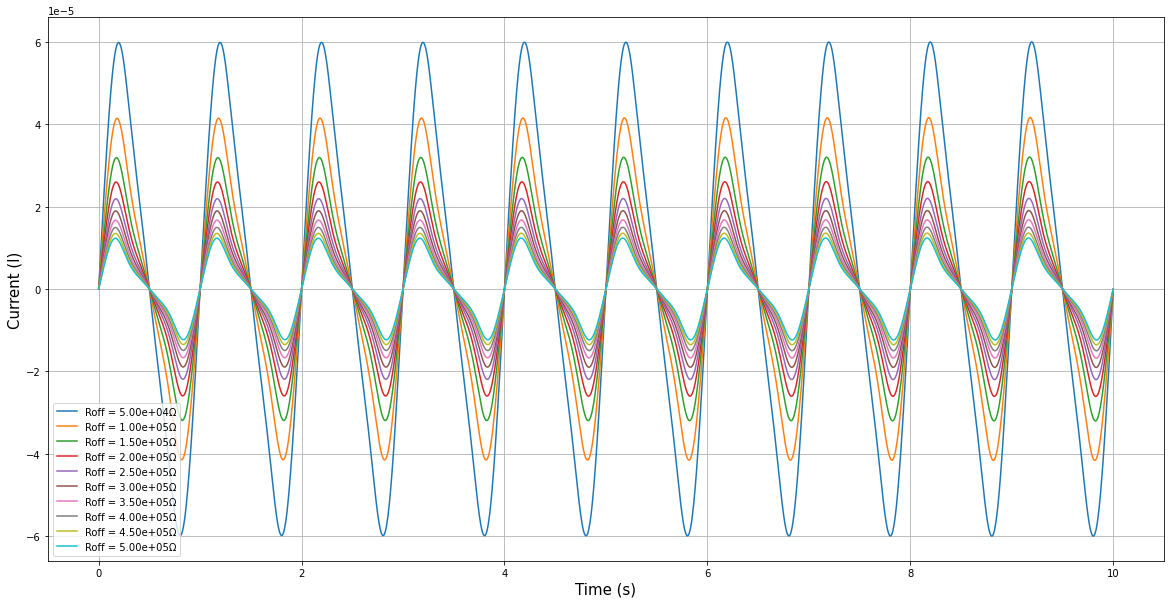

In [8]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

roff = [50e3,100e3,150e3,200e3,250e3,300e3,350e3,400e3,450e3,500e3]

roffi=[]
for i in range(len(roff)):
    roffi.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff[i],ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(roffi)):
    plt.plot(v,roffi[i][0],label='Roff = '+"{:.2e}".format(roff[i])+'\u03A9')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(roffi)):
    plt.plot(t,roffi[i][0],label='Roff = '+"{:.2e}".format(roff[i])+'\u03A9')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

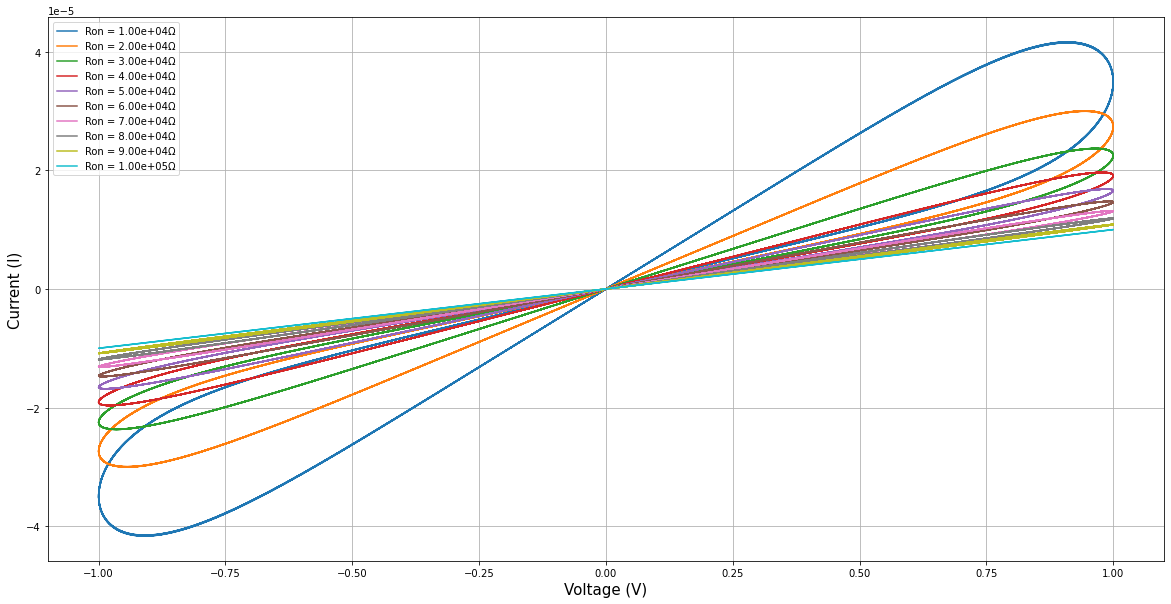

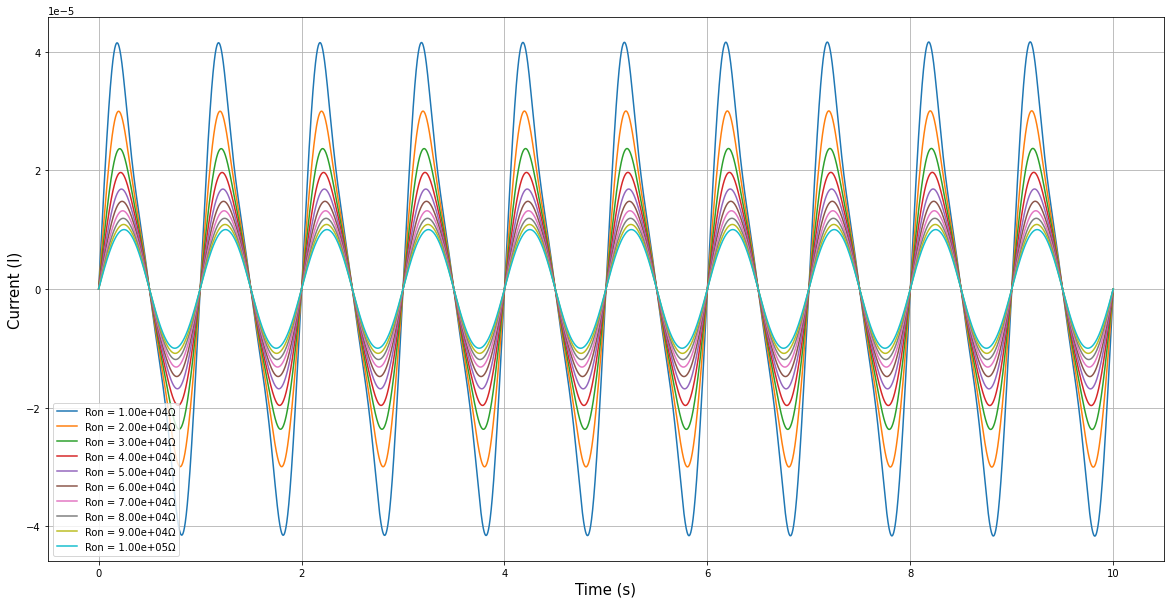

In [9]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

ron = [10e3,20e3,30e3,40e3,50e3,60e3,70e3,80e3,90e3,100e3]

roni=[]
for i in range(len(ron)):
    roni.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron[i],woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(roni)):
    plt.plot(v,roni[i][0],label='Ron = '+"{:.2e}".format(ron[i])+'\u03A9')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(roni)):
    plt.plot(t,roni[i][0],label='Ron = '+"{:.2e}".format(ron[i])+'\u03A9')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

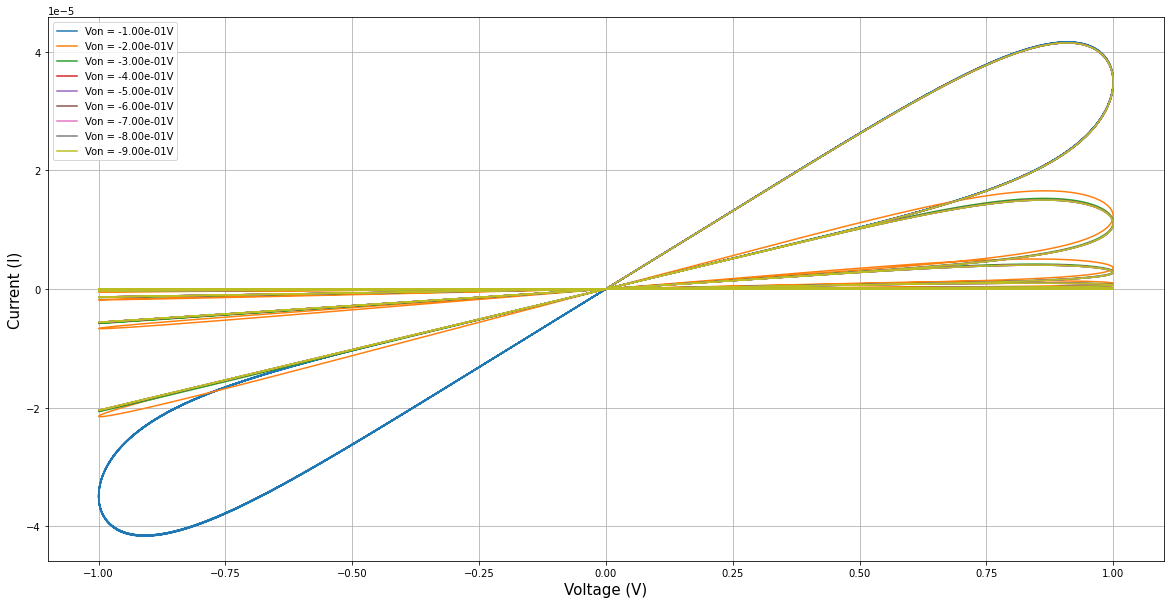

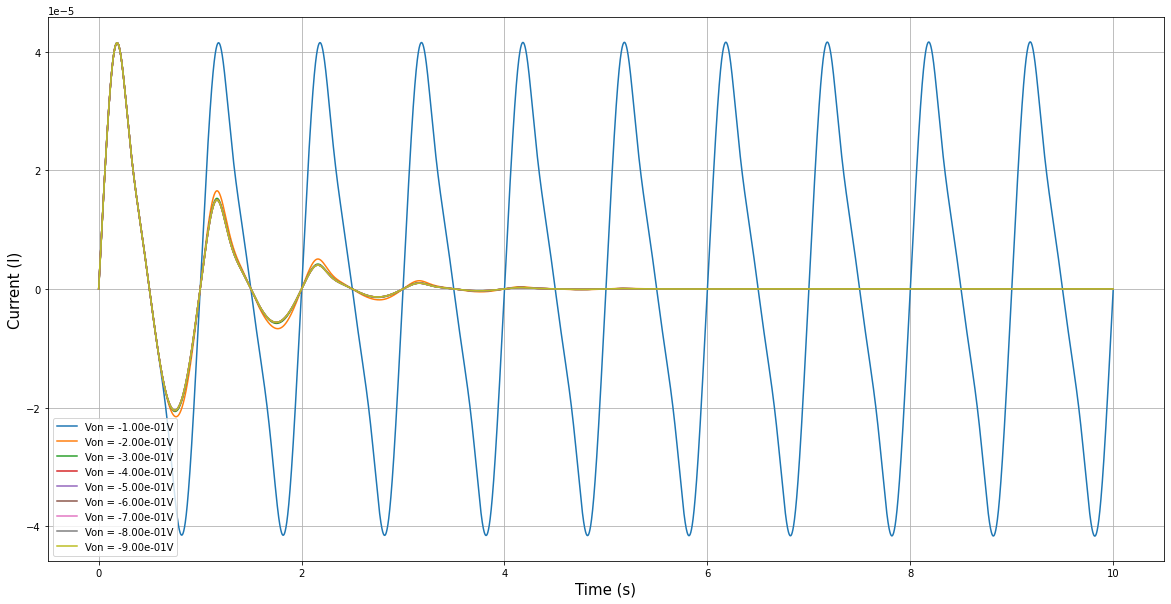

In [10]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

von = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9]

voni=[]
for i in range(len(von)):
    voni.append(vteam(v,t,w,koff,kon,aoff,aon,voff,von[i],roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(voni)):
    plt.plot(v,voni[i][0],label='Von = '+"{:.2e}".format(von[i])+'V')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(voni)):
    plt.plot(t,voni[i][0],label='Von = '+"{:.2e}".format(von[i])+'V')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

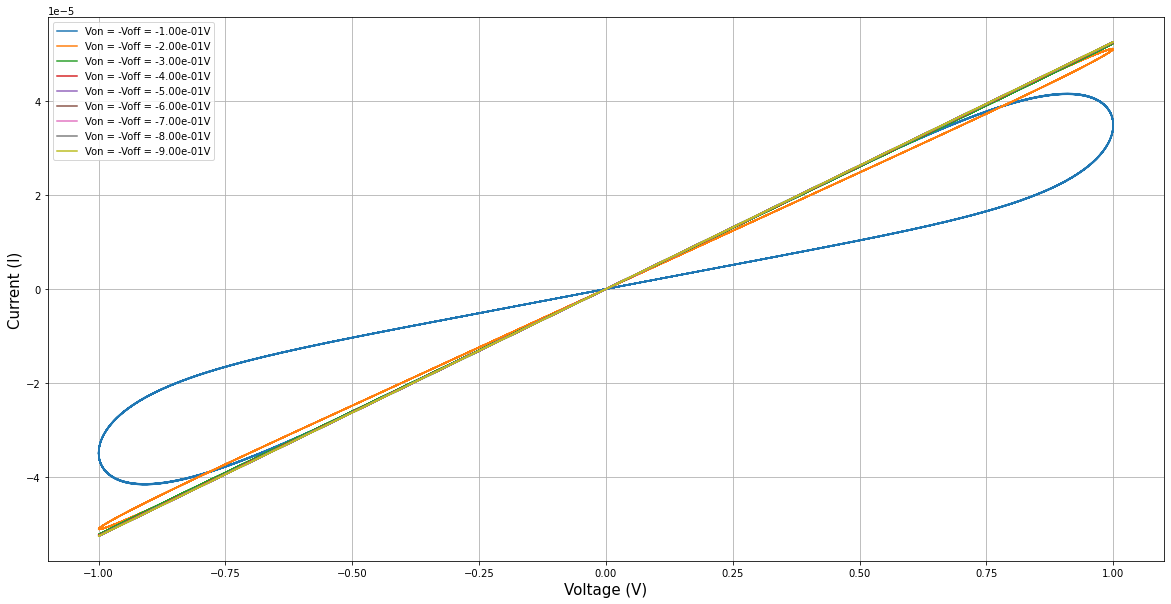

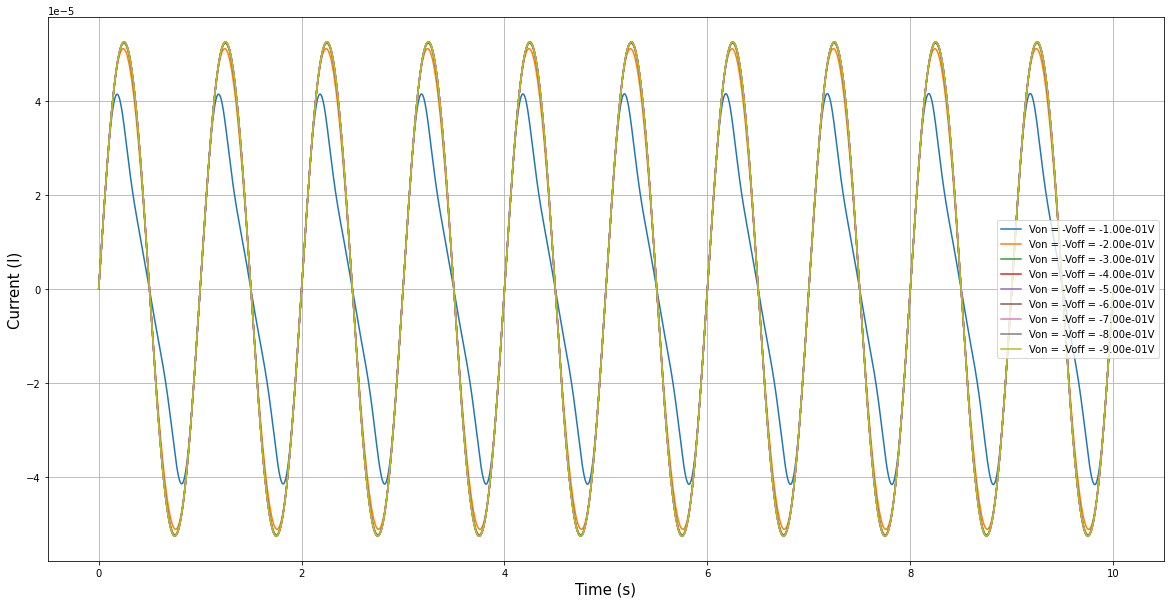

In [11]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

von = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9]
voff = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

voni=[]
for i in range(len(von)):
    voni.append(vteam(v,t,w,koff,kon,aoff,aon,voff[i],von[i],roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(voni)):
    plt.plot(v,voni[i][0],label='Von = -Voff = '+"{:.2e}".format(von[i])+'V')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(voni)):
    plt.plot(t,voni[i][0],label='Von = -Voff = '+"{:.2e}".format(von[i])+'V')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

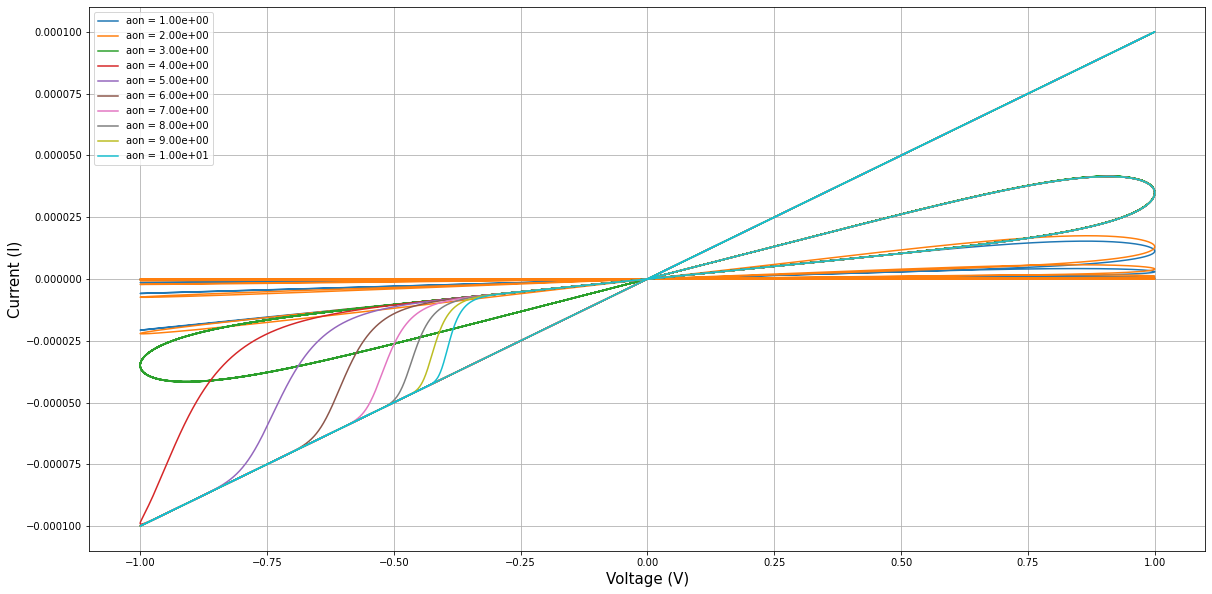

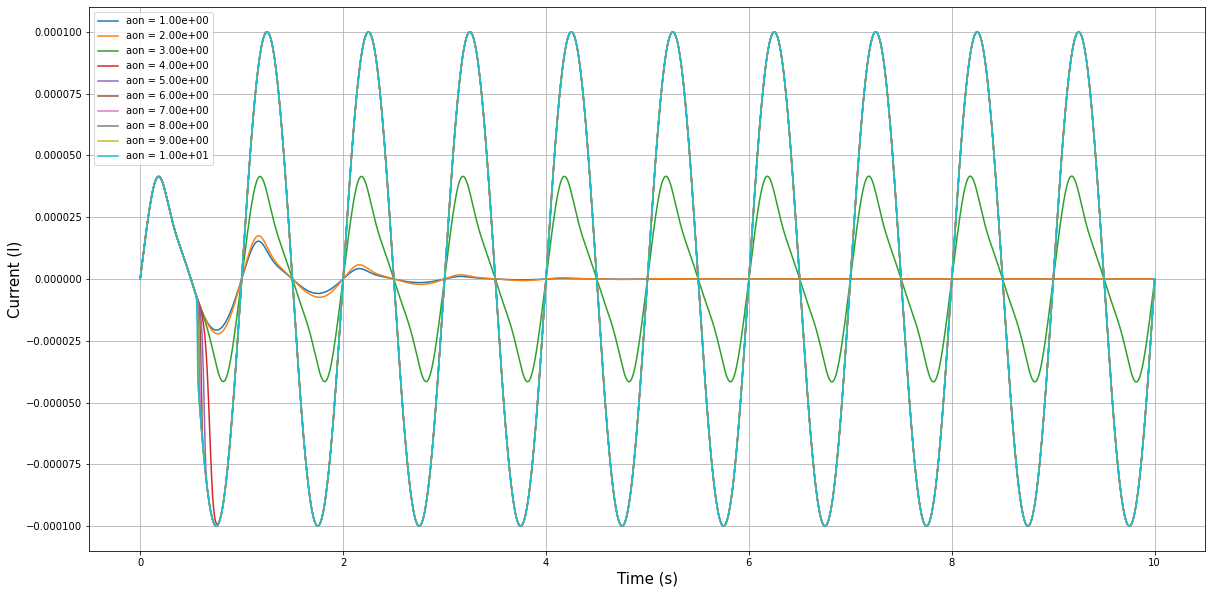

In [12]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

aon = [1,2,3,4,5,6,7,8,9,10]

aoni=[]
for i in range(len(aon)):
    aoni.append(vteam(v,t,w,koff,kon,aoff,aon[i],voff,von,roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(aoni)):
    #plt.subplot(5,2,i+1)
    plt.plot(v,aoni[i][0],label='aon = '+"{:.2e}".format(aon[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(aoni)):
    plt.plot(t,aoni[i][0],label='aon = '+"{:.2e}".format(aon[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

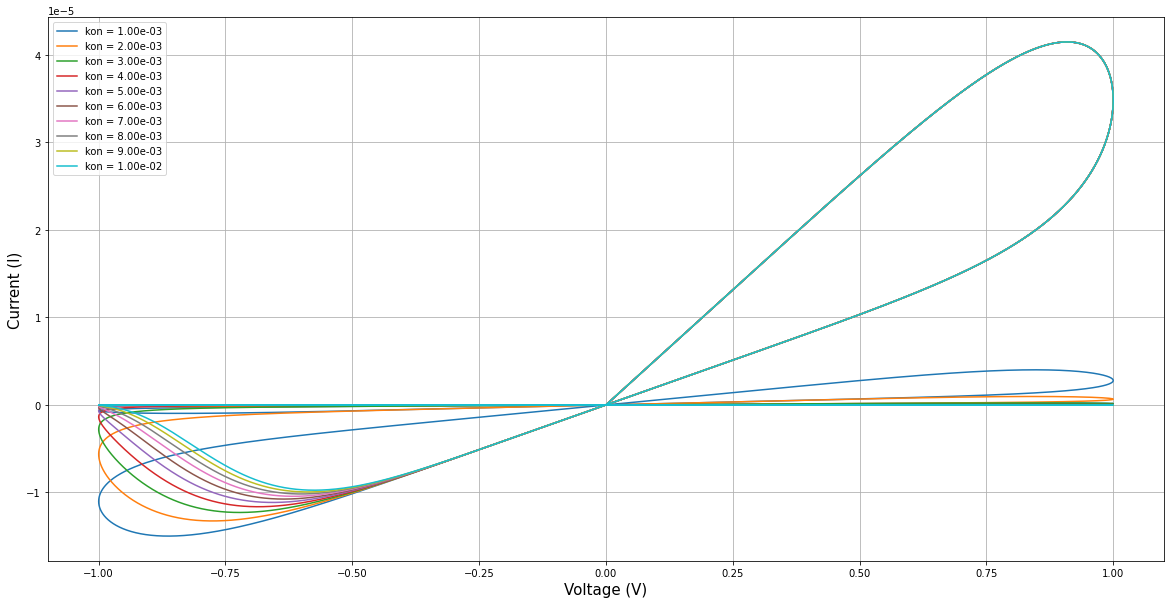

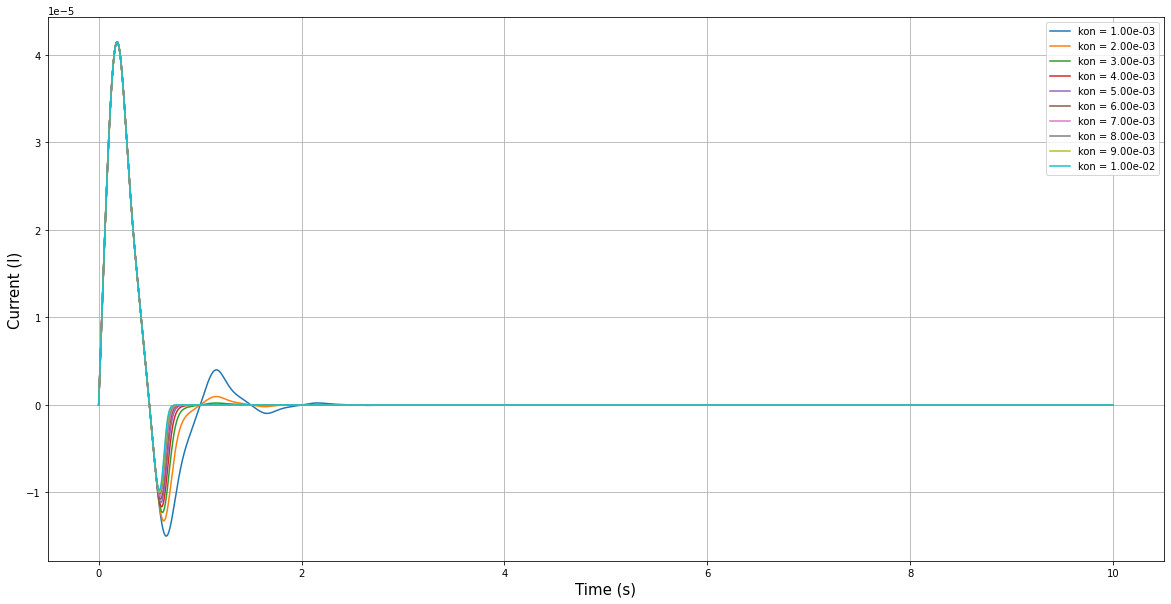

In [13]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

kon = [1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,9e-3,1e-2]

koni=[]
for i in range(len(kon)):
    koni.append(vteam(v,t,w,koff,kon[i],aoff,aon,voff,von,roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(koni)):
    plt.plot(v,koni[i][0],label='kon = '+"{:.2e}".format(kon[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(koni)):
    plt.plot(t,koni[i][0],label='kon = '+"{:.2e}".format(kon[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

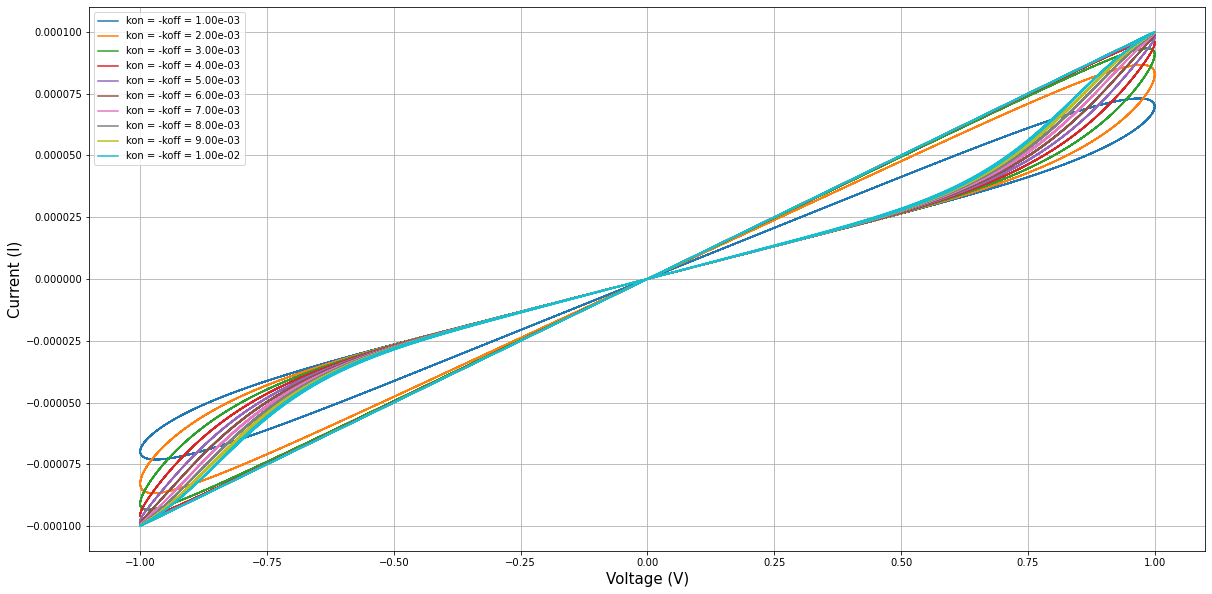

C:\Users\harry\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


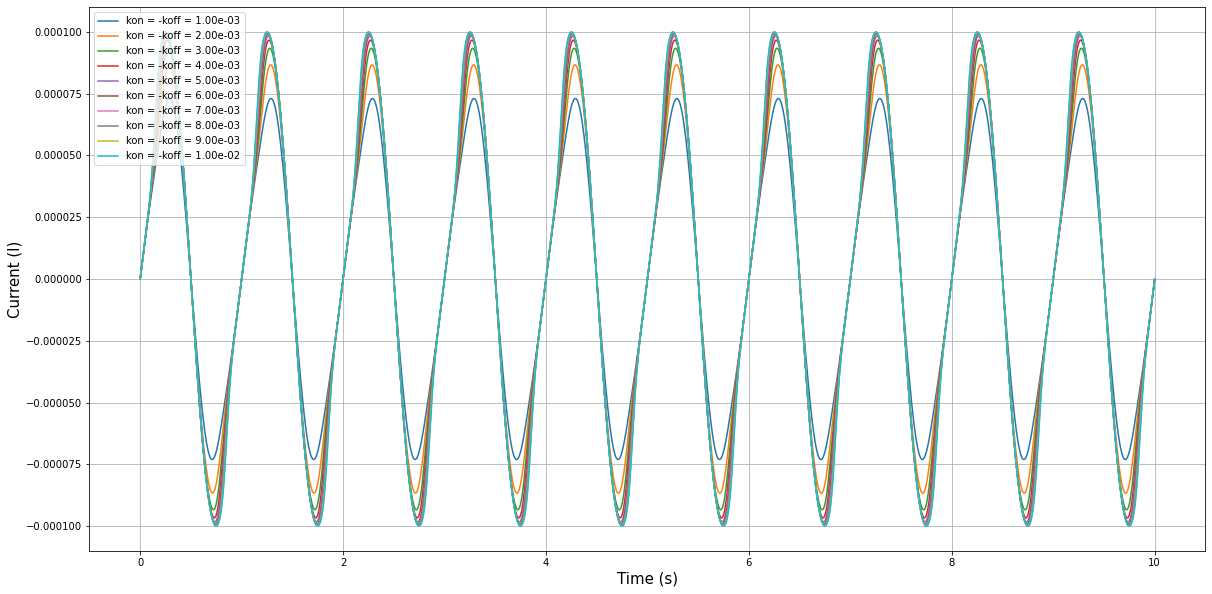

In [14]:
t = np.arange(0,10,0.00001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

kon = [1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,9e-3,1e-2]
koff = [-1e-3,-2e-3,-3e-3,-4e-3,-5e-3,-6e-3,-7e-3,-8e-3,-9e-3,-1e-2]

koni=[]
for i in range(len(kon)):
    koni.append(vteam(v,t,w,koff[i],kon[i],aoff,aon,voff,von,roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(koni)):
    plt.plot(v,koni[i][0],label='kon = -koff = '+"{:.2e}".format(kon[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(koni)):
    plt.plot(t,koni[i][0],label='kon = -koff = '+"{:.2e}".format(kon[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

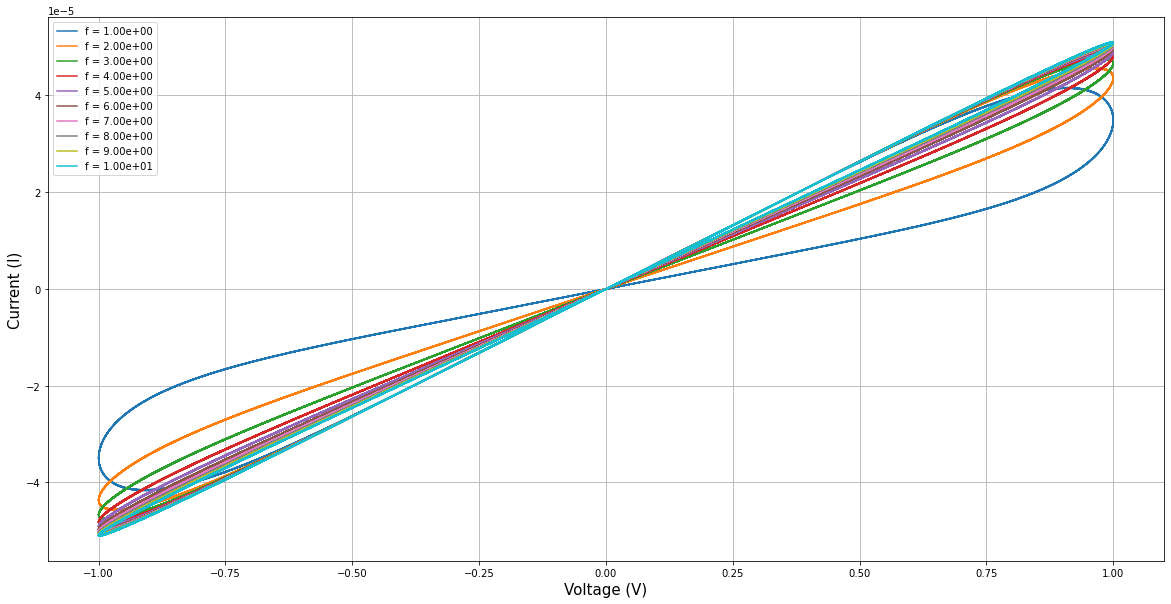

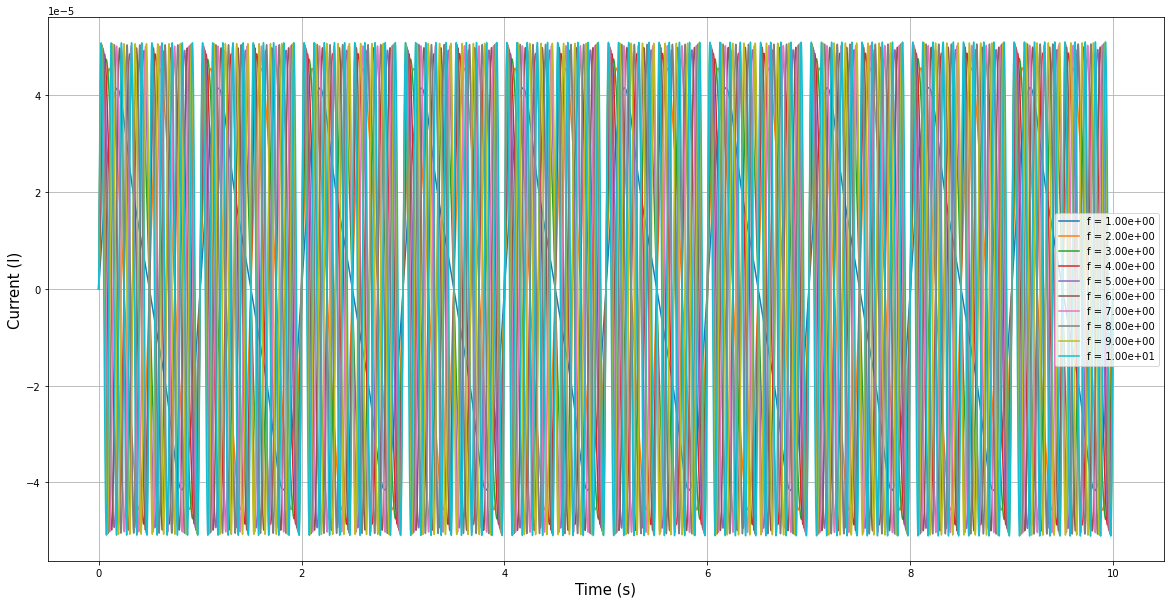

In [15]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

f=[1,2,3,4,5,6,7,8,9,10]
v = []
for i in range(len(f)):
    v.append(v0*np.sin(math.pi*2*f[i]*t))

vi=[]
for i in range(len(v)):
    vi.append(vteam(v[i],t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(vi)):
    plt.plot(v[i],vi[i][0],label='f = '+"{:.2e}".format(f[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(vi)):
    plt.plot(t,vi[i][0],label='f = '+"{:.2e}".format(f[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

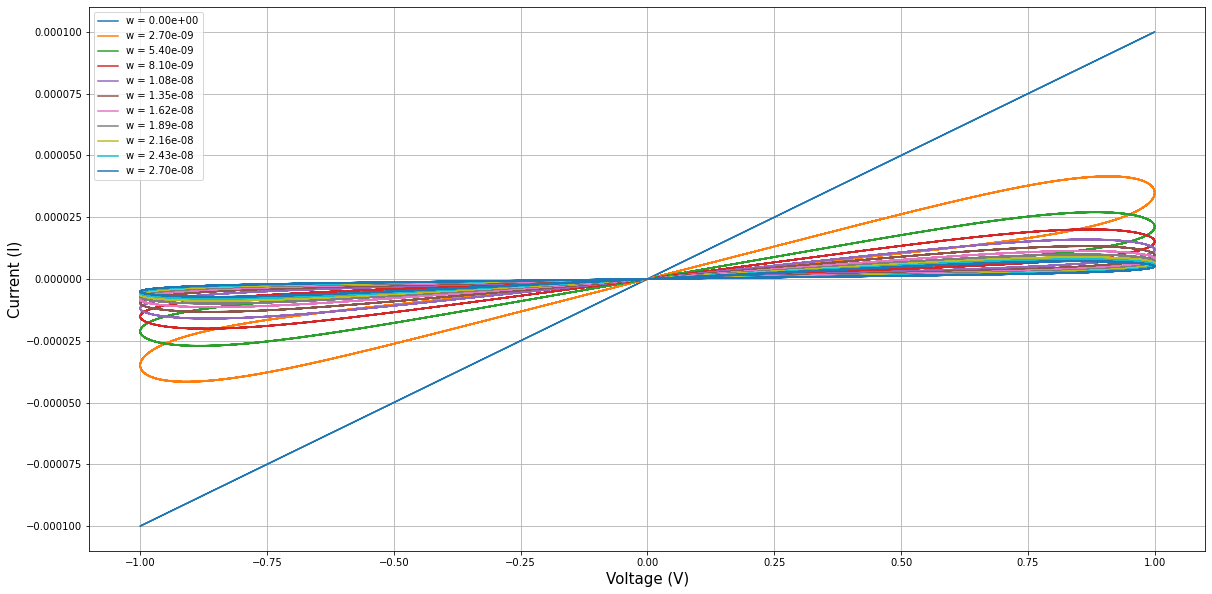

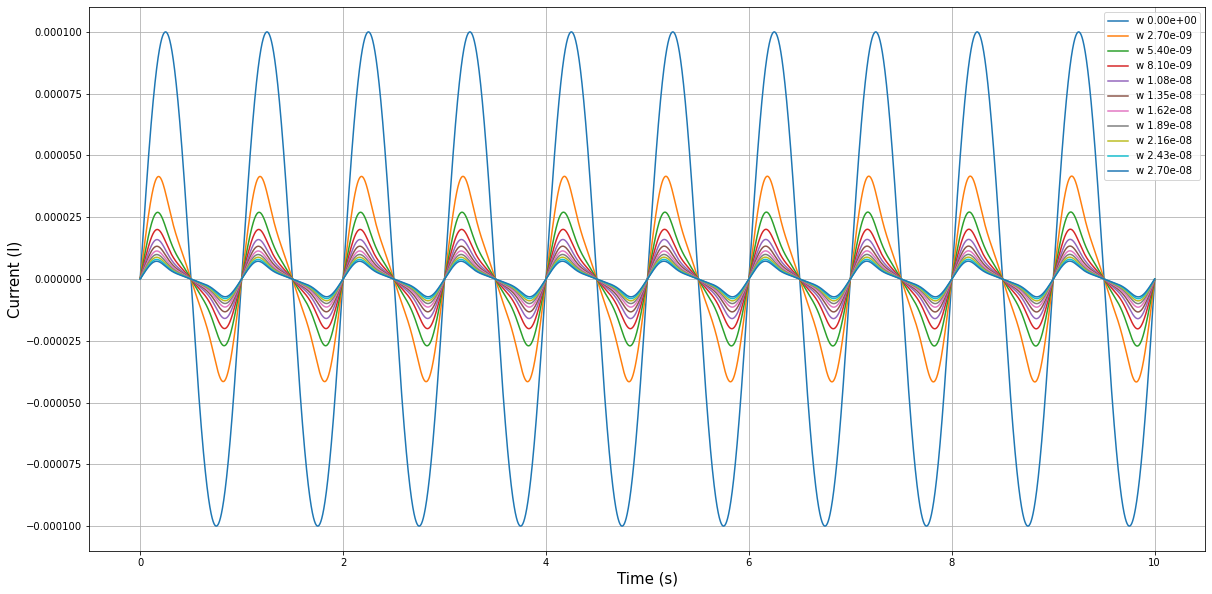

In [16]:
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

w = [0,2.7e-9,5.4e-9,8.1e-9,10.8e-9,13.5e-9,16.2e-9,18.9e-9,21.6e-9,24.3e-9,27e-9]

wi=[]
for i in range(len(w)):
    wi.append(vteam(v,t,w[i],koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j))

    
plt.figure(figsize=(20,10))
for i in range(len(wi)):
    plt.plot(v,wi[i][0],label='w = '+"{:.2e}".format(w[i]))
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(wi)):
    plt.plot(t,wi[i][0],label='w '+"{:.2e}".format(w[i]))
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [17]:
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data
file_path = 'D:\\harry\\PhD Work\\Project_Michael\\Data\\HP Memristor example 1hz ron10k roff100k xinit 0.9 d27nm'
data = SPICEfileReader(file_path,3)
st = data[:,0]
sv = data[:,1]
si = data[:,2]

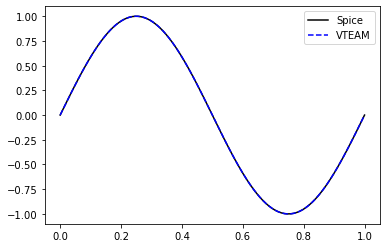

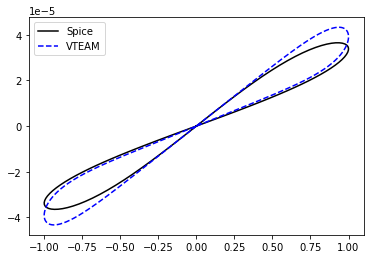

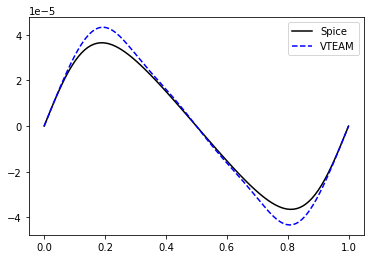

In [18]:
t = np.arange(0,1,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9#24.3e-9#2.7e-9
won = 0
woff = 27e-9
koff = 0.75e-3
kon = -0.75e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

i = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.plot(st,sv,color='black',label='Spice')
plt.plot(t,v,color='blue',label='VTEAM',linestyle='--')
plt.legend()
plt.show()

plt.plot(sv,si,color='black',label='Spice')
plt.plot(v,i[0],color='blue',label='VTEAM',linestyle='--')
plt.legend()
plt.show()

plt.plot(st,si,color='black',label='Spice')
plt.plot(t,i[0],color='blue',label='VTEAM',linestyle='--')
plt.legend()
plt.show()

In [19]:
def vteam_optim(v,koff,kon):
        'Memristor model based on the VTEAM model, input paramaters are'
        dt = 0.0001
        won = 0
        woff = 27e-9
        foff='prodromakis'
        fon='prodromakis'
        relationship='linear'
        w = 2.7e-9
        aoff = 3
        aon = 3
        voff = 0.1
        von = -0.1
        roff = 100e3
        ron = 10e3
        p = 1
        j = 10
        
        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))

        def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        if relationship == 'linear':
            rel = linear
        for k in range(len(v)):
            if k!=0:
                #dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
        return(out)
from scipy.optimize import curve_fit
t = np.arange(0,1,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
koff = 0.75e-3
kon = -0.75e-3

p0 = [koff,kon]
testx=sv
testy=si
p1,pp1 = curve_fit(vteam_optim,testx,testy,p0)

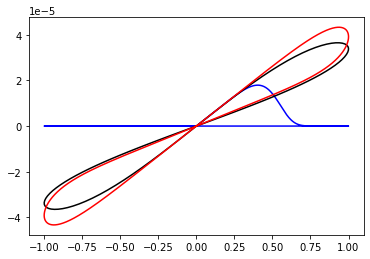

In [20]:
trial = vteam_optim(v,p1[0],p1[1])
original = vteam_optim(v,p0[0],p0[1])

plt.plot(v,trial,color='blue')
plt.plot(testx,testy,color='black')
plt.plot(v,original,color='red')


In [35]:
def vteam_jog(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='joglekar',fon='joglekar',relationship='linear'):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))
        
        def joglekar(x,p,j):
            dum = ((2*x)-1)**(2*p)
            return(1-dum)

        def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff == 'joglekar':
                    func = joglekar(x,p,j)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'joglekar':
                    func = joglekar(x,p,j)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        test =[]
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
                test.append(change)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
                test.append(0)
        return(out,boundarypos,test)

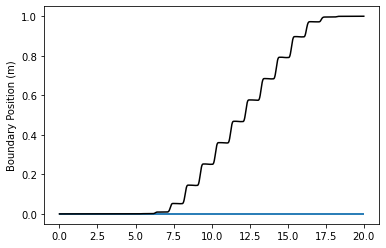

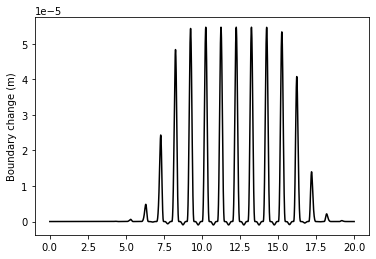

In [36]:
t = np.arange(0,20,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9#24.3e-9#2.7e-9
won = 0
woff = 27e-9
koff = 0.75e-3
kon = -0.75e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.3
roff = 100e3
ron = 10e3
p = 5
j = 10

i = vteam_jog(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

#plt.plot(st,sv,color='black',label='Spice')
#plt.plot(t,v,color='blue',label='VTEAM',linestyle='--')
#plt.legend()
#plt.show()

#plt.plot(sv,si,color='black',label='Spice')
#plt.plot(v,i[0],color='blue',label='VTEAM',linestyle='--')
#plt.legend()
#plt.show()
#
#plt.plot(st,si,color='black',label='Spice')
#plt.plot(t,i[0],color='blue',label='VTEAM',linestyle='--')
#plt.legend()
#plt.show()

plt.plot(t,i[1],color='black')
plt.ylabel('Boundary Position (m)')
plt.hlines(won,0,max(t))
plt.hlines(woff,0,max(t))
plt.show()

plt.plot(t,i[2],color='black')
plt.ylabel('Boundary change (m)')
plt.show()